In [1]:
import os, sys
sys.path.append('/Users/dimeji/Documents/Projects/geo_earth_temp/getemp')

# 1.  Import python dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

# 2. Location

For this tutorial, we’ll use the NIR and Red bands from a Landsat-8 scene above part of the central valley and the Sierra Nevada in California. We’ll be using Level 1TP datasets, orthorectified, map-projected images containing radiometrically calibrated data.

# 3. Bands needed from land surface temperature computation (Split window)
- Red: Band 4
- Near-Infrared (NIR): Band 5
- Thermal infrared 1: Band 10
- Thermal infrared 2: Band 11

Here, I have used `rasterio` to load the images/bands needed.

In [3]:
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
#url = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4) # L1TP_216074_20160531_20180528_01_T1_B4.TIF'
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)
tempband10 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(10)
tempband11 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(11)

In [4]:
with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(url+tempband10) as src:
    tempImage10 = src.read(1).astype('f4')

with rasterio.open(url+tempband11) as src:
    tempImage11 = src.read(1).astype('f4')

# 8. Compute land surface temperature

In [5]:
from pylandtemp import split_window

### Split window

Available methods to choose from include:

`'jiminez-munoz'`: Jiminez-Munoz et al, 2008 

`'kerr'`: Kerr Y et al, 2004

`'mc-millin'`: McMillin L. M. , 1975

`'price'`: Price J. C., 1984

`'sobrino-1993'`: Sobrino J. A. et al, 1993


In [6]:
method = 'price'
lst_image_split_window = split_window(
                                tempImage10, 
                                tempImage11, 
                                redImage, 
                                nirImage, 
                                lst_method=method, 
                                emissivity_method='avdan',
                                unit='celcius'
        )

##### Visualize the  Land Surface Temperature obtained

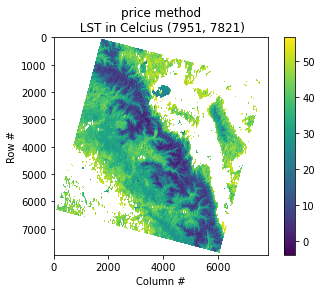

In [7]:
plt.imshow(lst_image_split_window)
plt.colorbar()
plt.title('{}\n LST in Celcius {}'.format(f'{method} method', lst_image_split_window.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()